In [1]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [2]:
data=pd.read_csv('CocaCola_Sales_Rawdata.csv')
df=pd.DataFrame(data)
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


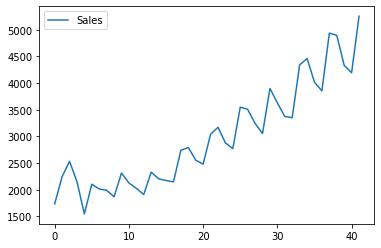

In [3]:
df.plot()
pyplot.show()

#### from above line plot we can see that sales increased over Quarters

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

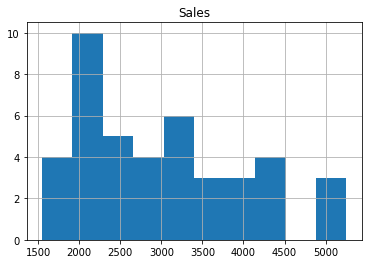

In [5]:
df.hist()

<AxesSubplot:ylabel='Density'>

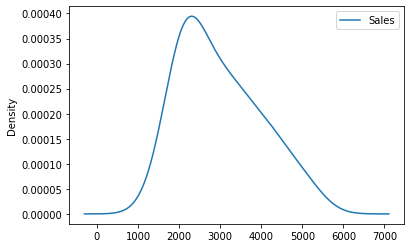

In [6]:
df.plot(kind='kde')

In [7]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [11]:
df.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [13]:
quar=['Q1','Q2','Q3','Q4']
n=df['Quarter'][0]
n[0:2]

'Q1'

In [15]:
df['quar']=0
df['quar']

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
Name: quar, dtype: int64

In [18]:
for  i in range(42):
    n=df['Quarter'][i]
    df['quar'][i]=n[0:2]
df['quar']

c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0     Q1
1     Q2
2     Q3
3     Q4
4     Q1
5     Q2
6     Q3
7     Q4
8     Q1
9     Q2
10    Q3
11    Q4
12    Q1
13    Q2
14    Q3
15    Q4
16    Q1
17    Q2
18    Q3
19    Q4
20    Q1
21    Q2
22    Q3
23    Q4
24    Q1
25    Q2
26    Q3
27    Q4
28    Q1
29    Q2
30    Q3
31    Q4
32    Q1
33    Q2
34    Q3
35    Q4
36    Q1
37    Q2
38    Q3
39    Q4
40    Q1
41    Q2
Name: quar, dtype: object

In [20]:
dum=pd.DataFrame(pd.get_dummies(df['quar']))
dum

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1
8,1,0,0,0
9,0,1,0,0


In [22]:
data2=pd.concat((df,dum),axis=1)
data2

,Quarter,Sales,quar,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


#### Spliting data into train and test

In [25]:
train=data2.head(30)
test=data2.tail(11)

## Moving Average

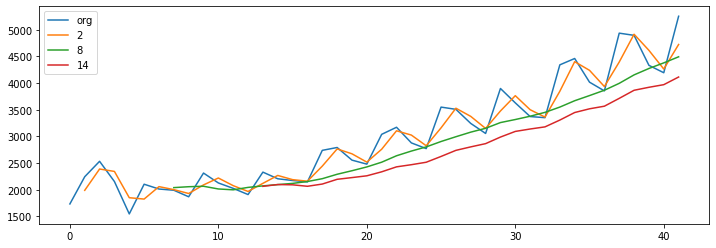

In [30]:
plt.figure(figsize=(12,4))
data2.Sales.plot(label="org")
for i in range(2,20,6):
    data2["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

## Time series decomposition plot 

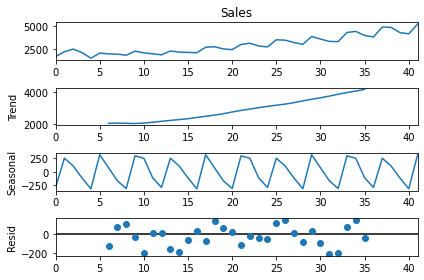

In [31]:
decompose_ts_add = seasonal_decompose(data2.Sales,period=12)
decompose_ts_add.plot()
plt.show()

### it shows upward trend and seasonality

# ACF plots and PACF plots

c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


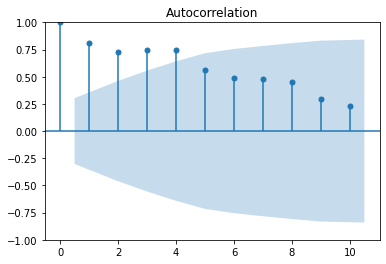

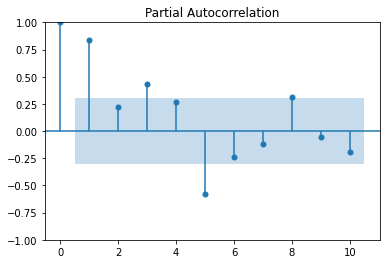

In [33]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(data2.Sales,lags=10)
tsa_plots.plot_pacf(data2.Sales,lags=10)
plt.show()

### from the above AFC plot we will discard 1st lag and next 4  lags are above blue area so p = 4 
### and in PACF we will discard 1st lag and next lag is above blue area so q = 1

### Evaluation Metric MAPE

In [34]:
#mean absolute percentage error
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

### Simple Exponential Method

In [35]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales) 

23.04137794753929

### Holt Method

In [36]:
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8 , smoothing_slope=0.2) #lev=alpha nd slope=beeta even if we dont give these values model will apply on its own
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales) 

c:\users\damanjeet kaur.laptop-b5chj9sc\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  """Entry point for launching an IPython kernel.


11.603267893970646

## Holts winter exponential smoothing with additive seasonality and additive trend

In [37]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Sales) 

6.5564080875363

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [38]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

7.890977215778122

### by evaluating Holts winter exponential smoothing with additive seasonality and additive trend method is best method because it gives least error i.e = 6.56

## Final Building Model by combining train and test

In [39]:
hwe_model_add_add = ExponentialSmoothing(data2["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()#with whole dataset

In [40]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

42    5044.724526
43    4921.696023
44    4892.726651
45    5588.309497
46    5634.035435
47    5383.500844
48    5300.027937
49    6040.323305
50    6098.560654
51    5838.215778
dtype: float64